In [1]:
%%time
import pandas as pd
from pvtm import pvtm

texts = pvtm.load_example_data()
texts = texts[:490]
new_texts = texts[4990:]


PVTM = pvtm.PVTM(texts, lemmatized = True, min_df = 0.005)
PVTM.fit(vector_size = 50, # dimensionality of the feature vectors (Doc2Vec)
         n_components = 20, # number of Gaussian mixture components, i.e. Topics (GMM)
         epochs=30)

0.005 0.95
8686 words in the vocabulary
Start clustering..
Finished clustering.
BIC: 123596.93156971877
Wall time: 8.72 s


In [34]:
%%time
import pandas as pd
from pvtm import pvtm

texts = pvtm.load_example_data()
texts = texts[:4990]
new_texts = texts[4990:]


PVTM = pvtm.PVTM(texts)
PVTM.preprocess(lemmatize = True, min_df = 0.005) # optional
PVTM.fit(vector_size = 50, # dimensionality of the feature vectors (Doc2Vec)
         n_components = 20, # number of Gaussian mixture components, i.e. Topics (GMM)
         epochs=30)

TypeError: preprocess() missing 1 required positional argument: 'lemmatized'

# TODO

- make infer_vector() work again
- webapp gif taskleiste ausblenden
- runde wordclouds für webapp (np.ogrid)
- readme -> "one" anstatt "you"
- remove stopwords from readme example
- make own preprocessing method
- searchtermbytopic assert method name
- make vec_sim std method for searchtopcibaterm
- make lemmatized more intuitive
- requirements.txt
- clean up repo
- set repo to public

# Topic Search by Keyword

best_matching_topic 5


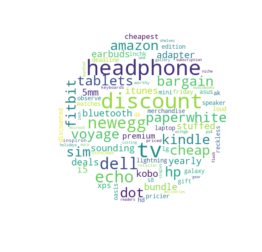

In [17]:
PVTM.search_topic_by_term(['black'], method='vec_sim')

best_matching_topic 0


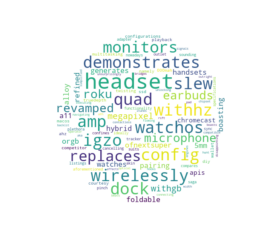

In [13]:
PVTM.search_topic_by_term(['black', "test"], variant="count", method='combine')

best_matching_topic 13


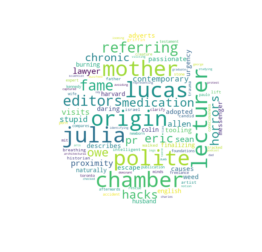

In [14]:
PVTM.search_topic_by_term(['black', "test"], variant="count", method='sim_docs')

In [33]:
import requests
def query_bert_summarizer(text, ratio=0.1, ip='46.101.174.112'):
    """
    Query a remote Bert summarizer
    """
    headers = {
        'Content-Type': 'text/plain',
    }

    params = (
        ('ratio', ratio),
    )

    data = text
    response = requests.post(f'http://{ip}:5000/summarize', headers=headers, params=params, data=data)
    return response



text = texts[2030].encode("utf-8")
print(text)
print('_'*200)
response = query_bert_summarizer(text, ratio=0.1, ip='46.101.203.124')
response.json()



b'Elon Musk\'s Boring Co. to bid on Chicago airport transit linkThe Boring company will bid to build a transit link between O\'Hare airport and downtown Chicago, CEO Elon Musk announced on Twitter. The project, unveiled on November 28th by Chicago Mayor Rahm Emanuel, aims to provide commuters with a 20-minute option to taxi or Uber rides, which cost between $40 and $60. The project could run under or below ground, and will be bankrolled "entirely by the concessionaire" and not taxpayers, the city said."The Boring Company will compete to fund, build & operate a high-speed Loop connecting Chicago O\'Hare Airport to downtown," said Musk in a tweet. Given Boring Company\'s tunneling expertise, that obviously means it\'s likely to propose an under-, rather than above-ground link.Chicago city officials recently took a trip to LA to discuss meet with Musk and presumably discuss his ideas for high speed rail, the Chicago Sun-Times notes. The Boring Company has shown off futuristic plans for a 

{'summary': 'Elon Musk\'s Boring Co. to bid on Chicago airport transit linkThe Boring company will bid to build a transit link between O\'Hare airport and downtown Chicago, CEO Elon Musk announced on Twitter. The Boring Company has shown off futuristic plans for a high-speed "skate" that would carry cars from point-to-point (shown below), but hasn\'t discussed subway-style transportation much.'}

# Webapp

In [12]:
PVTM.start_webapp()

In [11]:
PVTM.stop_webapp('*pvtm_webapp*')

# Inference

TODO: make it work again

In [19]:
string = "deal friday amazon"
steps=200
PVTM.infer_topics(string)

array([[1.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 5.74607838e-032, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        1.19049676e-105, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000]])

In [20]:
string = "deal"
steps=200
PVTM.infer_topics(string)

array([[1.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 7.98124211e-028, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        5.70859217e-103, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000]])

In [21]:
string = "startup phase"
steps=200
PVTM.infer_topics(string)

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.42053428e-35, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.49653061e-99,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

# Wordclouds

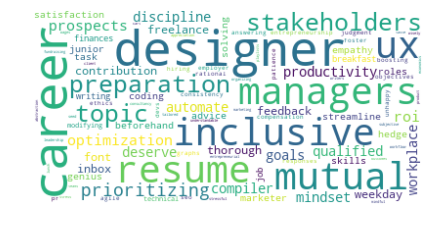

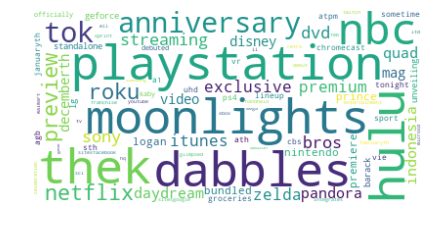

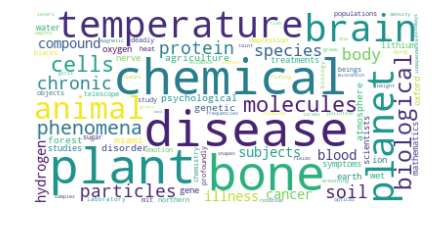

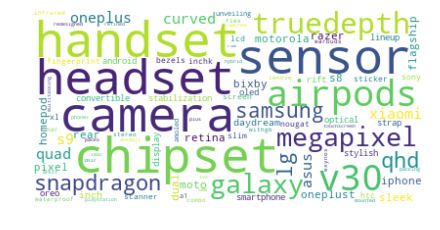

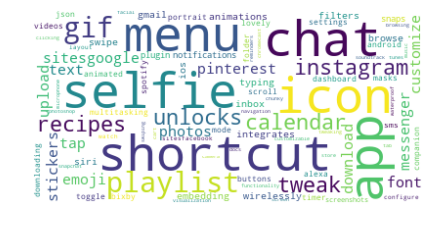

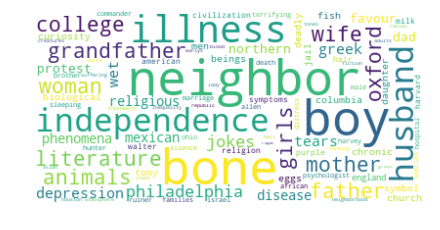

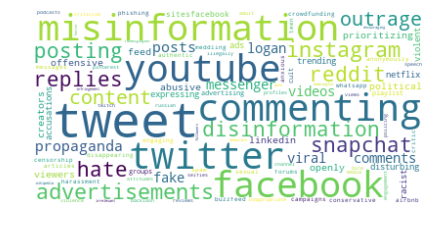

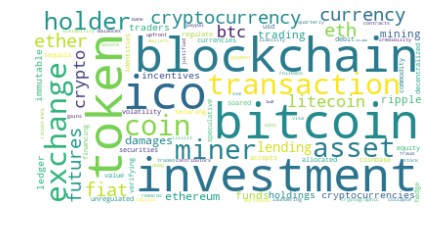

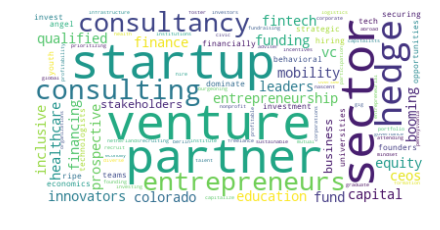

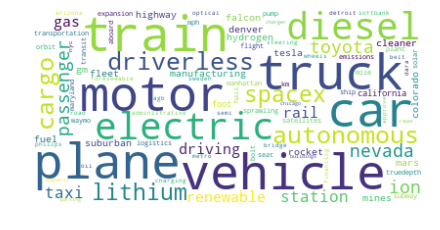

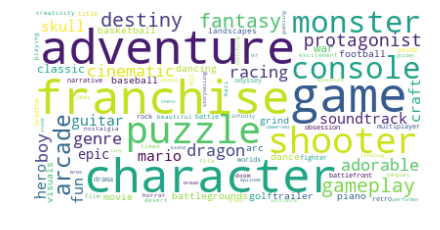

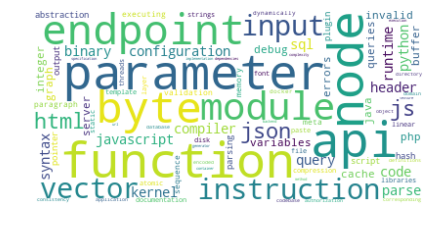

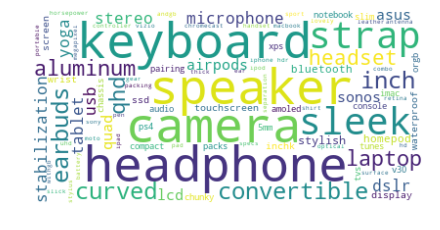

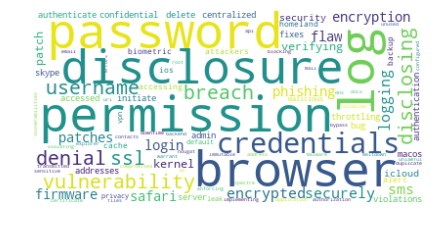

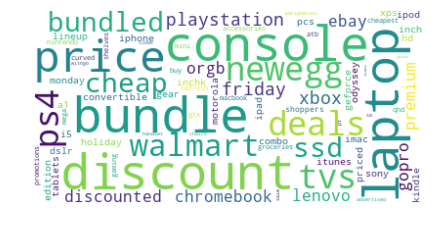

In [7]:
for i in range(15):
    PVTM.wordcloud_by_topic(i)

### Original

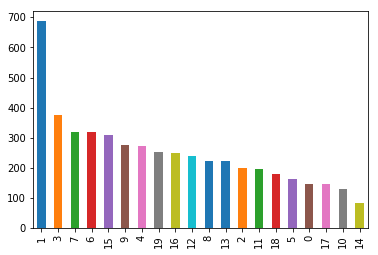

In [11]:
probs_orig = PVTM.gmm.predict(PVTM.doc_vectors)
pd.Series(probs_orig).value_counts().plot(kind="bar")

### Infered

Wall time: 9min 29s


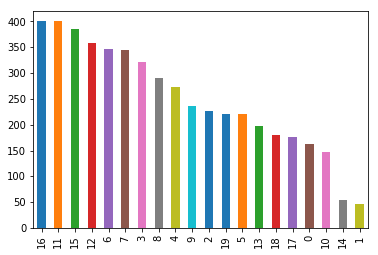

In [18]:
import numpy as np

def filter_by_vocab(text, vocab):
    return " ".join([word for word in text.split() if word in vocab])


vocab = frozenset(PVTM.tfidf.vocabulary_.keys())
cleantext = [pvtm.clean(text) for text in texts]
cleanfiltertext = [filter_by_vocab(text, vocab) for text in cleantext]
%time vecs = np.array([PVTM.model.infer_vector(text.split(), steps=150, alpha=0.025) for text in cleanfiltertext])
topics = PVTM.gmm.predict(vecs)
pd.Series(topics).value_counts().plot(kind="bar")


In [19]:
jj = []
k = 0
for i in range(1000):
    ivec = PVTM.model.infer_vector(doc_words=cleanfiltertext[i].split(), steps=20, alpha=0.025)
    new = PVTM.gmm.predict(np.mean(PVTM.doc_vectors[[j[0] for j in PVTM.model.docvecs.most_similar(positive=[ivec], topn=10)]], axis=0).reshape(1,-1))[0]
    orig = PVTM.gmm.predict(PVTM.doc_vectors[i].reshape(1,-1))[0]
    jj.append([new, orig])
    if new == orig : k+=1
        
k / i

0.7817817817817818

In [20]:
PVTM.gmm.predict(PVTM.model.infer_vector(nn.words.split(), steps=20, alpha=0.025).reshape(1,-1))

NameError: name 'nn' is not defined

In [ ]:
PVTM.wordcloud_by_topic(3)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(vec, PVTM.doc_vectors[0].reshape(1,-1)))
# print(cosine_similarity(vec2, PVTM.doc_vectors[2].reshape(1,-1)))
sims = pd.Series([cosine_similarity(vec, PVTM.doc_vectors[i].reshape(1,-1))[0][0] for i in range(4000)])
sims.plot(kind="hist", bins=60)

In [ ]:
sims[sims>0.5]

In [ ]:
texts[0]

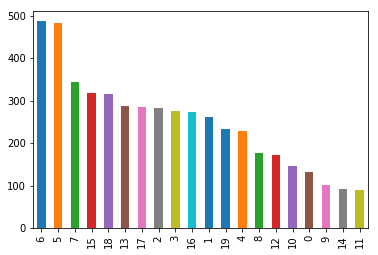

In [93]:
topics = PVTM.gmm.predict_proba(PVTM.doc_vectors).argmax(1)
pd.Series(topics).value_counts().plot(kind="bar")

best_matching_topic 16


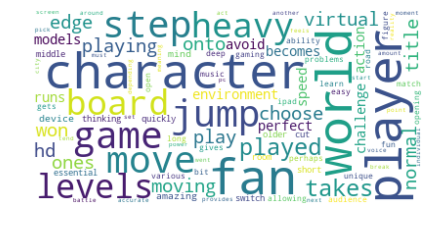

In [13]:
PVTM.search_topic_by_term(["game"], method=1, variant="sim")

In [6]:
import joblib
joblib.dump(PVTM, "pvtmmodel.pickle")

ppv = joblib.load("pvtmmodel")

In [22]:
ppv.wordcloud_by_topic(1)

NameError: name 'ppv' is not defined

In [ ]:
import subprocess

subprocess.call(["python", "webapp.py", "-m", "pvtm_model"])

In [1]:

def start_webapp(self, model_path=None, title="pvtm_webapp"):
    import os
    
    if not model_path:
         tmp_save_path = 'pvtm_model_tmp'
        self.save(tmp_save_path)
        time.sleep(1)        
        os.system(f'start cmd.exe /c "TITLE {title}&& python webapp.py -m {tmp_save_path}"')
        
        
def stop_webapp(self, title):
    import os
    os.system(f'taskkill /fi "WindowTitle eq {title}"')

0

In [44]:
import pandas as pd
%time s = pd.read_csv("J:/nextcloud/istari/webai/data/sector_trainingdata.csv", sep="\t", index_col="Unnamed: 0", nrows=100000)


Wall time: 2.87 s


In [45]:
p = pvtm.PVTM(s.text.values, lemmatized=True, min_df=0.005, language="de")


0.005 0.95
7146 words in the vocabulary


In [47]:
ntopics = s.label.unique().shape[0]
print(ntopics)
%time p.fit(vector_size=40, n_components=ntopics, epochs=15)

42
Start clustering..
Finished clustering.
BIC: 2067129.1717586769
Wall time: 10min 10s


C:\Users\Dlenz\Anaconda3\envs\py36\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


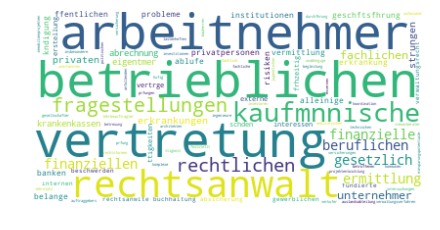

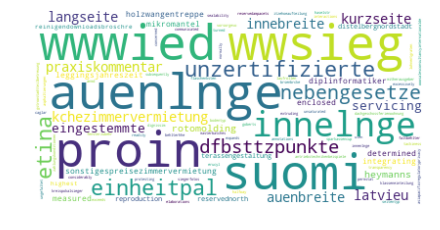

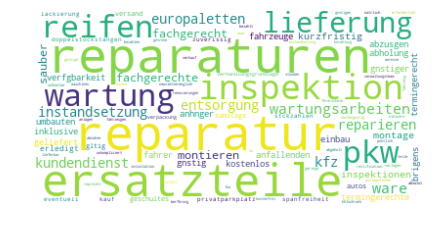

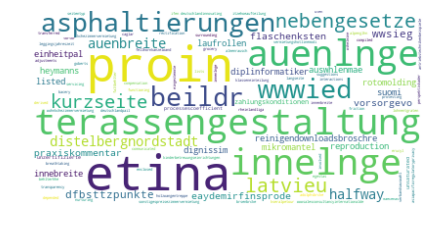

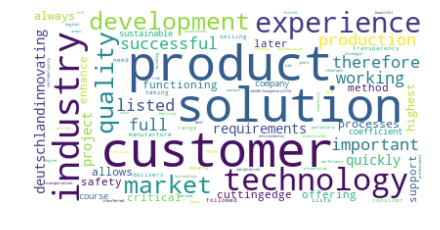

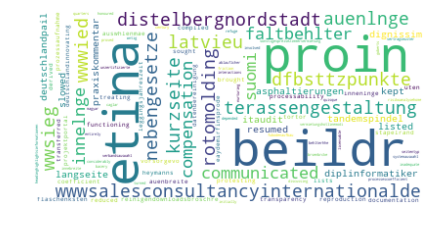

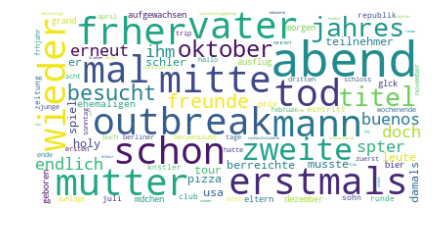

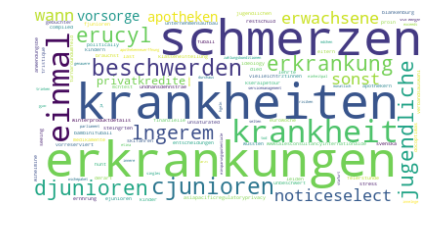

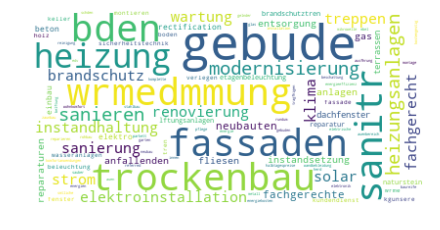

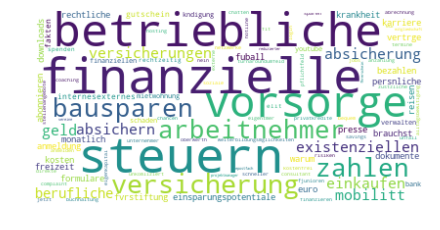

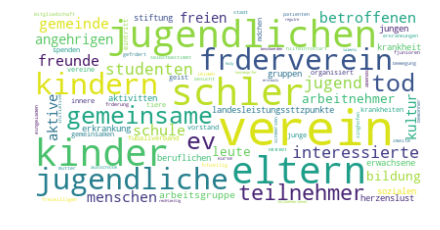

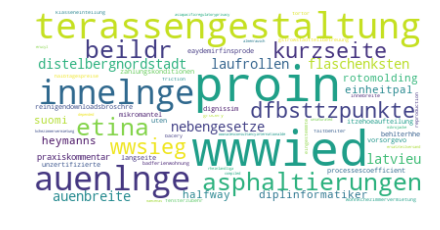

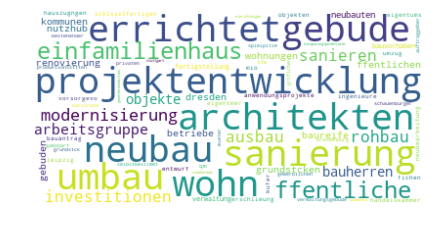

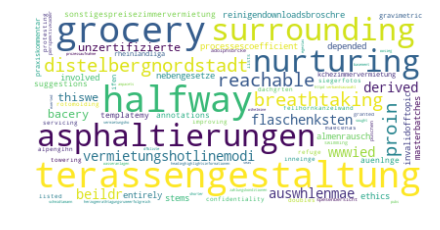

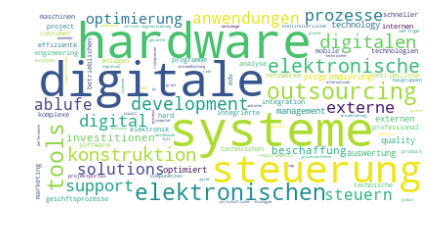

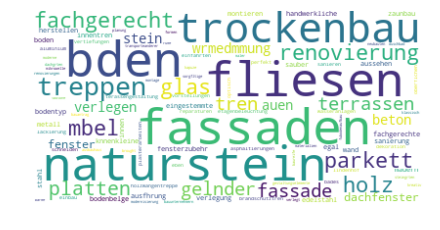

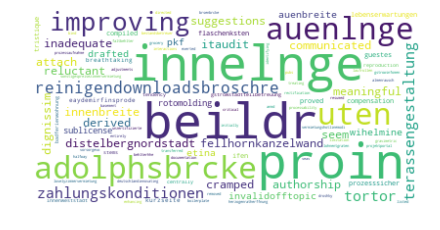

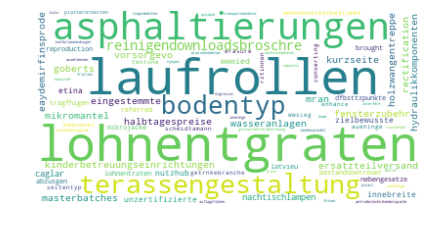

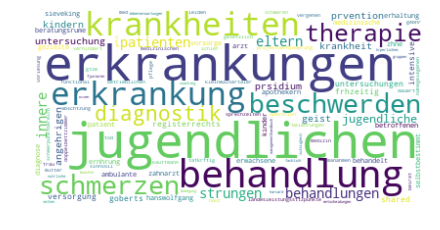

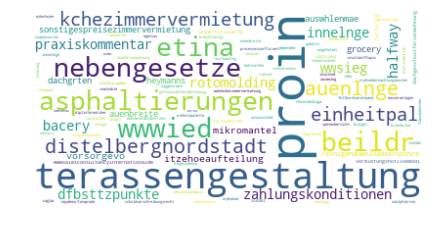

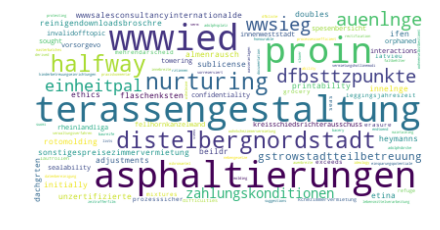

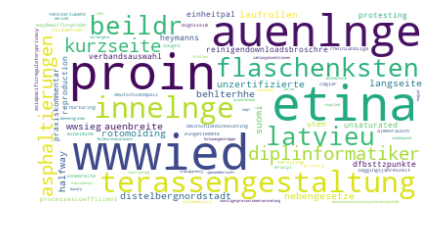

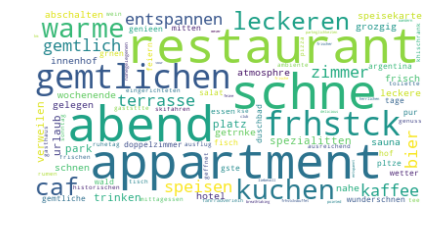

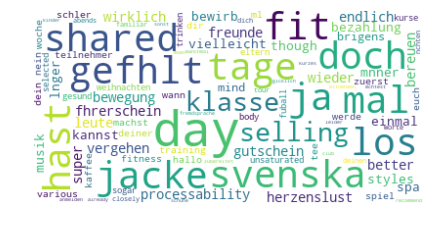

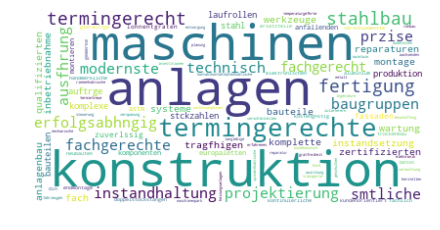

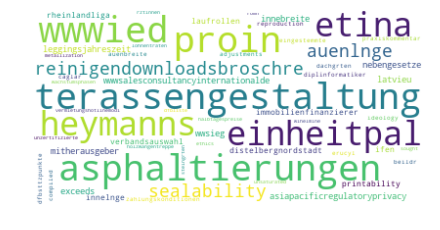

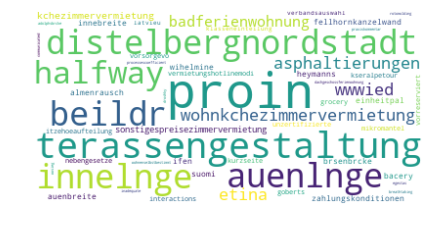

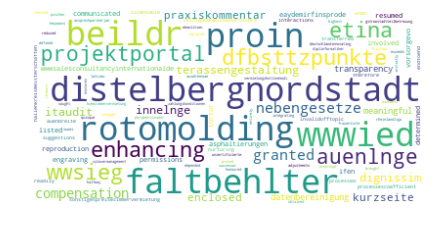

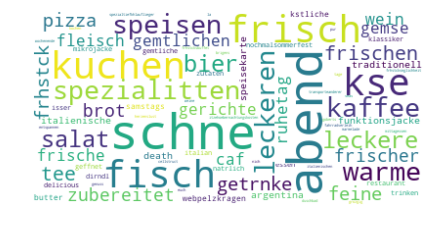

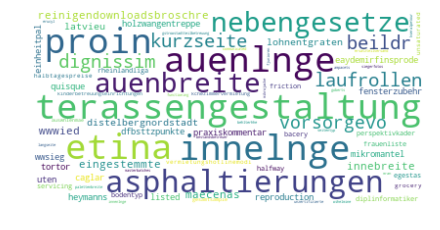

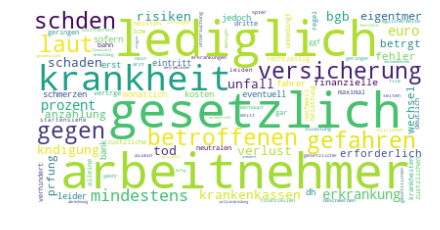

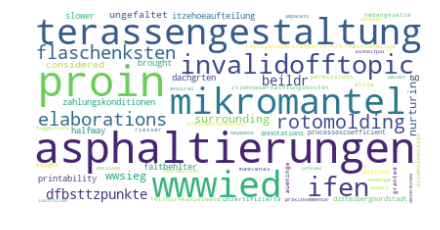

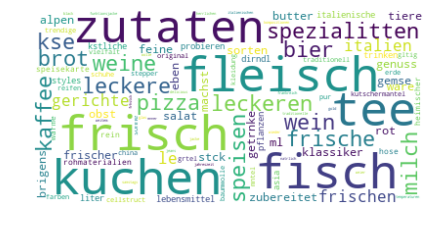

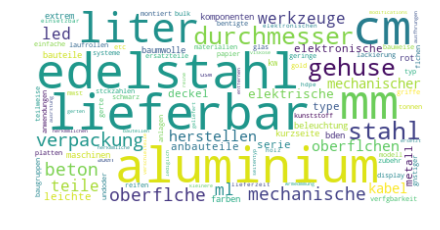

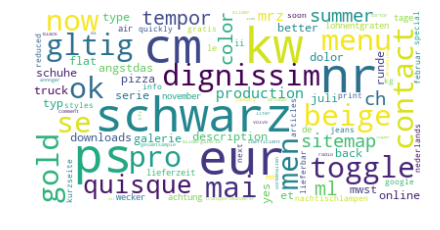

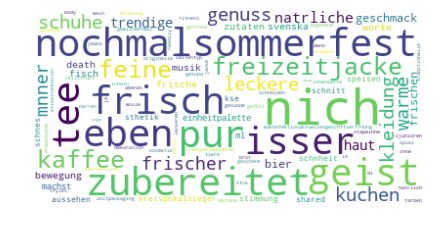

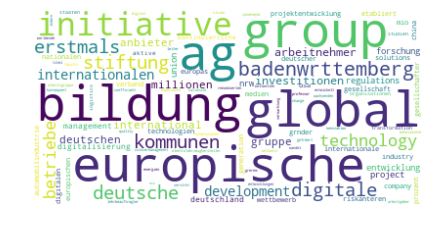

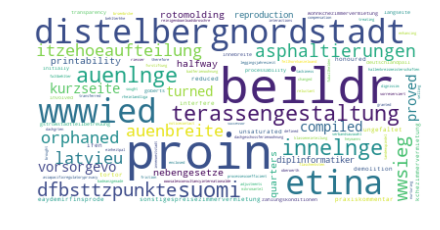

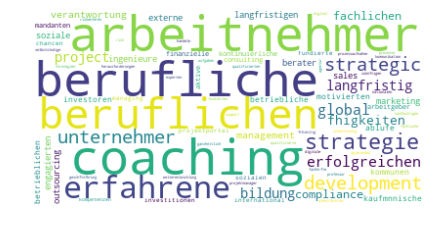

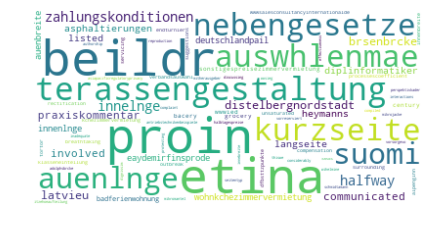

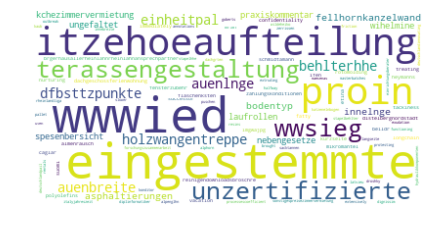

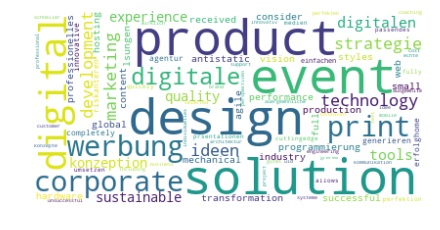

In [48]:
for i in range(ntopics):
    p.wordcloud_by_topic(i)

In [49]:
pd.Series(p.gmm.predict(p.doc_vectors)).value_counts()

3     12857
21     6254
11     6215
26     4703
19     4679
24     4659
17     4102
34     3302
15     3139
33     2964
18     2610
10     2416
6      2104
38     2087
22     2016
14     1968
13     1960
2      1948
0      1843
35     1737
12     1624
4      1519
41     1433
23     1403
5      1396
27     1396
36     1346
30     1316
25     1284
1      1276
8      1254
39     1232
37     1220
40     1204
20     1198
29     1181
16     1176
31     1172
28     1128
32     1120
9       306
7       253
dtype: int64

In [52]:
s["topic"] = p.gmm.predict(p.doc_vectors)

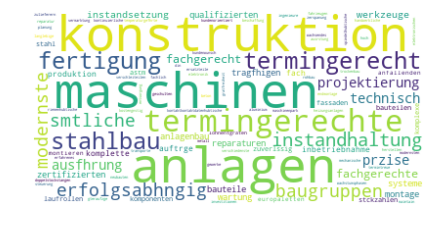

In [70]:
p.wordcloud_by_topic(24)

In [69]:
s.groupby('sector').topic.value_counts().unstack().fillna(0).idxmax(1).value_counts()

24    9
3     5
15    4
33    3
10    3
32    2
26    2
21    2
18    2
11    2
6     1
4     1
5     1
36    1
13    1
35    1
19    1
2     1
dtype: int64

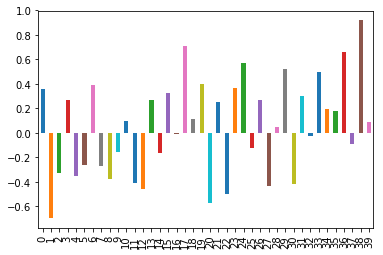

In [77]:
pd.Series(p.doc_vectors.mean(0)).plot(kind="bar")

In [81]:
p.doc_vectors.mean(1).

(100000,)